In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'saeidi.XLS')
df.head()

WARNING *** file size (37973080) not 512 + multiple of sector size (512)


,SAL,CO_VA,CO_VA_N,SE_PR,ZI_SE,SH_PR,ID_PR,NAME,SH_GH,JO_ET,...,FEE_AM_MO,FEE_AM_KA,KARBAR_DA_HA,KARBAR_HA,KARBAR_DA_VA,KARBAR_RE,KARBAR_SOBA,KARBAR_PINA,KARBAR_SO_VA,KARBAR_MO
0,1401,102,رفسنجان,10,1,40102363,991428,پروژه تعويض سيم به کابل خودنگهدار پست زميني ام...,1401112.0,470,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1401,102,رفسنجان,10,1,40102363,991428,پروژه تعويض سيم به کابل خودنگهدار پست زميني ام...,1401112.0,470,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1401,102,رفسنجان,10,1,40102363,991428,پروژه تعويض سيم به کابل خودنگهدار پست زميني ام...,1401112.0,470,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1401,102,رفسنجان,10,1,40102363,991428,پروژه تعويض سيم به کابل خودنگهدار پست زميني ام...,1401112.0,470,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1401,102,رفسنجان,10,1,40102363,991428,پروژه تعويض سيم به کابل خودنگهدار پست زميني ام...,1401112.0,470,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['SAL', 'CO_VA', 'CO_VA_N', 'SE_PR', 'ZI_SE', 'SH_PR', 'ID_PR', 'NAME',
       'SH_GH', 'JO_ET', 'CO_KA', 'CO_KA_N', 'NA_AM', 'KA_AM', 'NO_KA',
       'NO_KA_N', 'TA_KA', 'TA_KA_N', 'AN_AM', 'AN_AM_N', 'VA_KA_N', 'CO_FE',
       'CO_ET', 'KARBAR', 'TED_KA_BR_AS', 'TED_AM_BR_AS', 'TED_KA_BR_MOK',
       'TED_AM_BR_MOK', 'TED_KA_BR_MO', 'TED_AM_BR_MO', 'ZA_KA_BR_AS',
       'ZA_AM_BR_AS', 'ZA_KA_BR_MOK', 'ZA_AM_BR_MOK', 'ZA_KA_BR_MO',
       'ZA_AM_BR_MO', 'FEE_KA_BR_AS', 'FEE_AM_BR_AS', 'FEE_KA_BR_MOK',
       'FEE_AM_BR_MOK', 'FEE_KA_BR_MO', 'FEE_AM_BR_MO', 'TED_KA_JA_BR_AS',
       'TED_KA_JA_BR_MOK', 'TED_KA_JA_MO', 'FEE_KA_JA_BR_AS',
       'FEE_KA_JA_BR_MOK', 'FEE_KA_JA_MO', 'TED_DA_HA', 'TED_DA_AZGH',
       'TED_HA', 'FEE_DA_HA', 'FEE_DA_AZGH', 'FEE_HA', 'TED_DA_VA',
       'TED_VA_AZGH', 'TED_RE', 'FEE_DA_VA', 'FEE_VA_AZGH', 'FEE_RE',
       'TED_SOBA', 'TED_PINA', 'TED_KA_SO_VA', 'TED_KA_MO', 'FEE_KA_SO_VA',
       'FEE_KA_MO', 'TED_AM_SO_VA', 'TED_AM_MO', 'TED_AM_KA', 'F

Getting the required fields

In [23]:
data = df[
    [
        'CO_VA', # code of the unit
        'CO_KA', # code for the item
        'TED_KA_BR_AS',# count of the item 
        'FEE_KA_BR_AS', # TODO: price per item in IRR
        'SH_PR', # project ID
        'CO_KA_N'
    ]
].copy()
data.head()

,CO_VA,CO_KA,TED_KA_BR_AS,FEE_KA_BR_AS,SH_PR,CO_KA_N
0,102,141278001,30.0,8080731.0,40102363,وينچ كلمپ پليمري
1,102,144052549,129.0,80754000.0,40102363,کابل فشار ضعيف خود نگهدار 25+25+(50+50*3)
2,102,1440525521,2.0,60524528.0,40102363,کليد فيوز کابل خودنگهدار با کابلشو
3,102,153520129,3.0,88773232.8,40102363,جعبه انشعاب ابتداي فيدر
4,102,203062028,2.0,15543264.0,40102363,جلو بر کابل خودنگهدار 120 سانتي متري


In [28]:
data['CO_KA'] = data['CO_KA'].astype('str')
data['CO_KA']

0         141278001
1         144052549
2        1440525521
3         153520129
4         203062028
            ...    
19539     111031601
19540     111031601
19541     111031202
19542     111031202
19543          1668
Name: CO_KA, Length: 19544, dtype: object

In [29]:
query_idx = data['CO_KA'] == '144052549'
data.loc[query_idx, 'SH_PR']

1        40102363
176      40102031
519      40102349
1139     40102165
2415     40102329
           ...   
18291    40102810
18348    40102812
18349    40102812
18751    40102834
18752    40102834
Name: SH_PR, Length: 61, dtype: int64

In [11]:
df.dtypes

SAL              int64
CO_VA            int64
CO_VA_N         object
SE_PR            int64
ZI_SE            int64
                 ...  
KARBAR_RE       object
KARBAR_SOBA     object
KARBAR_PINA     object
KARBAR_SO_VA    object
KARBAR_MO       object
Length: 80, dtype: object

In [13]:
data['total_price'] = data['TED_KA_BR_AS'] * data['FEE_KA_BR_AS']
data.head()

,CO_VA,CO_KA,TED_KA_BR_AS,FEE_KA_BR_AS,SH_PR,total_price
0,102,141278001,30.0,8080731.0,40102363,2.424219e+08
1,102,144052549,129.0,80754000.0,40102363,1.041727e+10
2,102,1440525521,2.0,60524528.0,40102363,1.210491e+08
3,102,153520129,3.0,88773232.8,40102363,2.663197e+08
4,102,203062028,2.0,15543264.0,40102363,3.108653e+07


In [14]:
data.shape

(19544, 6)

In [15]:
df.shape

(19544, 80)

In [50]:
data['TED_KA_BR_AS']

0         30.0
1        129.0
2          2.0
3          3.0
4          2.0
         ...  
19539      0.0
19540      0.0
19541    110.0
19542     85.0
19543      0.0
Name: TED_KA_BR_AS, Length: 19544, dtype: float64

In [17]:
data['FEE_KA_BR_AS'].shape

(19544,)

In [18]:
data[['TED_KA_BR_AS','FEE_KA_BR_AS']].shape

(19544, 2)

In [19]:
(data['TED_KA_BR_AS'] * data['FEE_KA_BR_AS']).shape

(19544,)

In [20]:
type(data['FEE_KA_BR_AS'])

pandas.core.series.Series

In [22]:
type(data['FEE_KA_BR_AS'].to_numpy())

numpy.ndarray

In [36]:
item_types = data['CO_KA_N'].unique()

In [49]:
idx = [(i.startswith('کابل')) and ((i.find('خود نگهدار') >= 0) or (i.find('خودنگهدار') >= 0)) for i in item_types]
item_types[idx]

array(['کابل فشار ضعيف خود نگهدار 25+25+(50+50*3)',
       'کابل فشار ضعيف خود نگهدار 25+25+(70+70*3)',
       'کابل فشارضعيف خودنگهدار 16+25+50+70*3 صرفا جهت جمع آوري',
       'کابل فشار ضعيف خود نگهدار 25+25+(35+35*3)',
       'کابل فشار ضعيف خود نگهدار 35+16+35*1',
       'کابل فشار ضعيف خود نگهدار 35+35+16+25*1',
       'کابل فشار ضعيف خود نگهدار 35+16+16*1'], dtype=object)

In [43]:
item_types[1]

'کابل فشار ضعيف خود نگهدار 25+25+(50+50*3)'

In [58]:
unique_pair = {}
for v in data[['CO_KA_N','CO_KA']].values:
    key, val = v[0], v[1]
    if key in unique_pair:
        a = unique_pair[key]
        unique_pair[key] = (a[0], a[1] + 1)
    else:
        unique_pair[key] = (val, 1)
unique_pair

{'وينچ كلمپ پليمري': ('141278001', 58),
 'کابل فشار ضعيف خود نگهدار 25+25+(50+50*3)': ('144052549', 61),
 'کليد فيوز کابل خودنگهدار با کابلشو': ('1440525521', 21),
 'جعبه انشعاب ابتداي فيدر': ('153520129', 18),
 'جلو بر کابل خودنگهدار 120 سانتي متري': ('203062028', 30),
 'پيچ ومهره دوسر350ـ16': ('290332464', 85),
 'واشرچهارگوش': ('297004070', 345),
 'جلو بر کابل خودنگهدار 80 سانتي متري': ('203062027', 76),
 'تيرگرد بتوني  پيش تنيده  9/200': ('201027725', 287),
 'كلمپ ارتباط خط خود نگهدار64 دندانه': ('1440525520', 356),
 'پيچ و مهره دم خوكي خود نگهدار240*16': ('144052519', 202),
 'كلمپ انتهايي  فشار ضعيف خود نگهدار': ('144052517', 475),
 'پيچ و مهره دم خوكي خود نگهدار300*16': ('144052525', 426),
 'كلمپ ارتباط خط خود نگهدار32 دندانه': ('1440525519', 250),
 'حفرچاه ارت معمولي': ('1694', 315),
 'سيستم ارتينگ عميق فشارضعيف يكپارچه': ('200510150', 262),
 'تيرگرد بتوني  پيش تنيده  9/400': ('201027726', 451),
 'مهره چشمي': ('203020806', 213),
 'بتون ريزي فشارضعيف (دوغاب پاي تير)': ('1697', 361

In [62]:
unique_pair = data[['CO_KA_N','CO_KA']].value_counts()
unique_pair

CO_KA_N                                       CO_KA    
پيچ ومهره يكسر300-16                          292032461    502
كلمپ انتهايي  فشار ضعيف خود نگهدار            144052517    475
تيرگرد بتوني  پيش تنيده  9/400                201027726    451
کابل فشار ضعيف خود نگهدار 25+25+(70+70*3)     144052550    431
پيچ و مهره دم خوكي خود نگهدار300*16           144052525    426
                                                          ... 
سركابل 20 كيلوولت داخلي خشك 185*3             126505147      1
سركابل 20 كيلوولت داخلي خشك 95*1              126505136      1
سركابل 20 كيلوولت هوايي خشك 95*1              126505131      1
پايه فلزي روشنايي 6 متري (صرفا جهت جمع آوري)  172910966      1
كنكتورمسي نمره35                              141353061      1
Length: 577, dtype: int64

In [70]:
for i in unique_pair.items():
    print(i)
    break

(('پيچ ومهره يكسر300-16', '292032461'), 502)


In [81]:
i[0][0]

'پيچ ومهره يكسر300-16'

In [80]:
i[1]

502

In [82]:
idx = [(i[0][0].startswith('کابل')) and ((i[0][0].find('خود نگهدار') >= 0) or (i[0][0].find('خودنگهدار') >= 0)) for i in unique_pair.items()]

In [83]:
unique_pair[idx]

CO_KA_N                                                  CO_KA    
کابل فشار ضعيف خود نگهدار 25+25+(70+70*3)                144052550    431
کابل فشار ضعيف خود نگهدار 25+25+(50+50*3)                144052549     61
کابل فشار ضعيف خود نگهدار 35+16+35*1                     144052545     10
کابل فشارضعيف خودنگهدار 16+25+50+70*3 صرفا جهت جمع آوري  111031318     10
کابل فشار ضعيف خود نگهدار 25+25+(35+35*3)                144052548      9
کابل فشار ضعيف خود نگهدار 35+16+16*1                     144052544      2
کابل فشار ضعيف خود نگهدار 35+35+16+25*1                  144052554      1
dtype: int64

In [84]:
df['total_price'] = df['TED_KA_BR_AS'] * df['FEE_KA_BR_AS']

In [90]:
data = df[['SH_PR','FEE_KA_BR_AS']].groupby('SH_PR').sum()
data.head()

,FEE_KA_BR_AS
SH_PR,
40102000,5.849186e+08
40102001,4.135580e+08
40102002,0.000000e+00
40102003,1.305517e+09
40102004,4.053624e+08


In [88]:
import seaborn as sns

<AxesSubplot:xlabel='FEE_KA_BR_AS'>

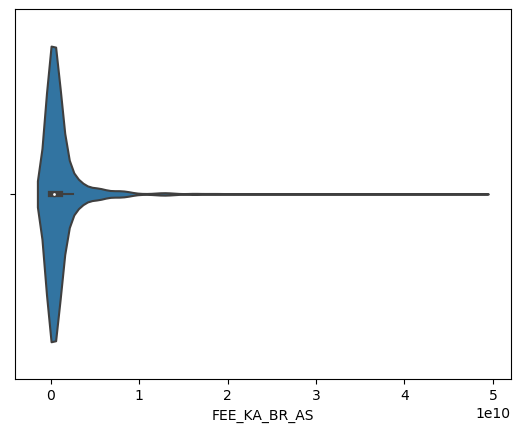

In [91]:
sns.violinplot(x=data['FEE_KA_BR_AS'])